## Neural Network Regression with PyTorch

In [21]:
import torch
from torch import nn
import matplotlib.pyplot as plt

### 1. Data preparation

In [22]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * x + bias

x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
train_split = int(0.8 * len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [24]:
def plot_prediction(train_data = x_train, train_label = y_train, test_data = x_test, 
                    test_label = y_test, prediction = None):
    
    plt.figure(figsize = (10, 7))
    
    plt.scatter(train_data, train_label, c = "b", s = 4, label = "Training data")  
    plt.scatter(test_data, test_label, c = "g", s = 4, label = "Testing data")

    if prediction is not None:
        plt.scatter(test_data, prediction, c = "r", s = 4, label = "Prediction")

        plt.legend(prop = {"size" : 14});

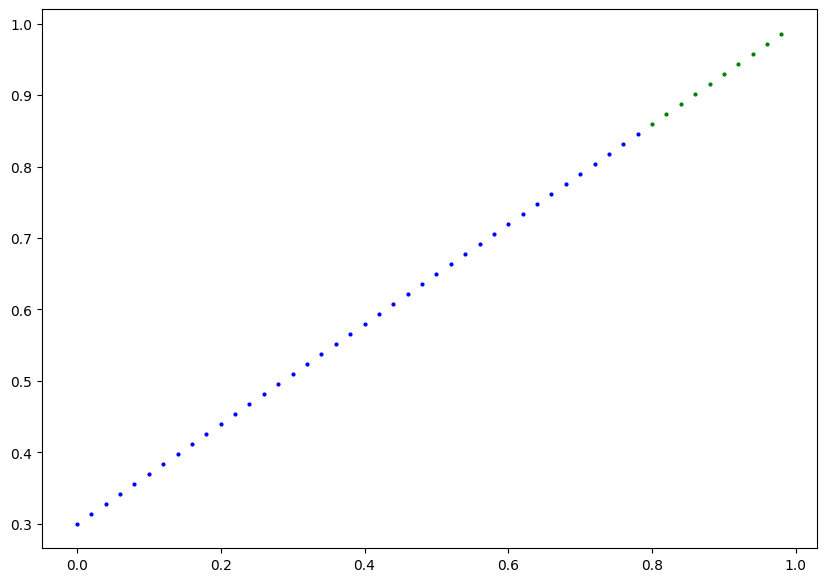

In [25]:
plot_prediction();

### 2. Model building

In [26]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [27]:
torch.manual_seed(42)

first_model = LinearRegressionModel()

print(list(first_model.parameters()))

# Parameter list
print(first_model.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [28]:
with torch.inference_mode(): 
    y_pred = first_model(x_test)

In [29]:
print(f"Number of testing samples: {len(x_test)}") 
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values:\n{y_pred}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


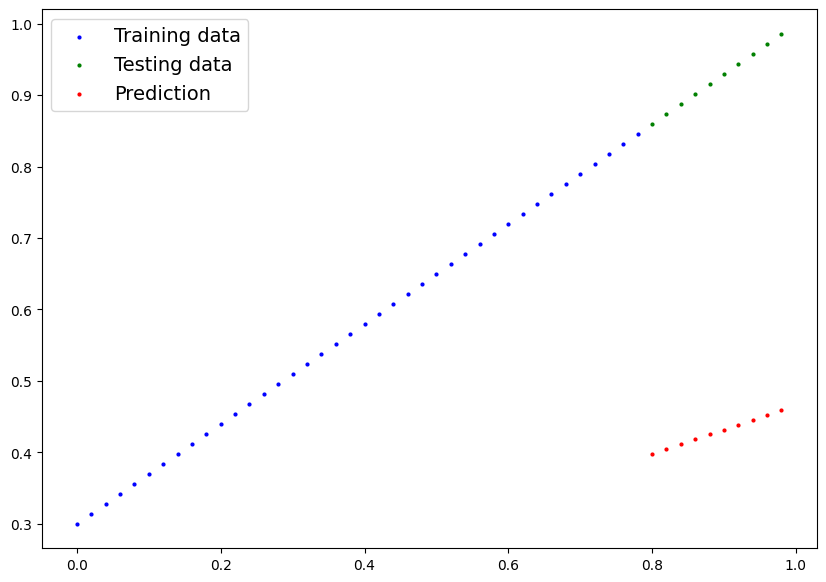

In [30]:
plot_prediction(prediction = y_pred)

In [31]:
y_test - y_pred

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [32]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = first_model.parameters(), lr = 0.01)

In [33]:
torch.manual_seed(42)

epoch_number = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epoch_number):
    first_model.train()
    y_pred = first_model(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    first_model.eval()
    with torch.inference_mode():
        test_pred = first_model(x_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


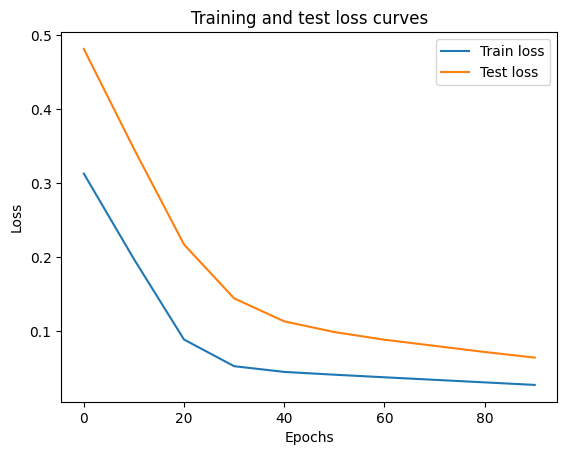

In [34]:
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [35]:
print("The model learned the following values for weights and bias:")
print(first_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [36]:
first_model.eval()

with torch.inference_mode():
    y_pred = first_model(x_test)
    
y_pred

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

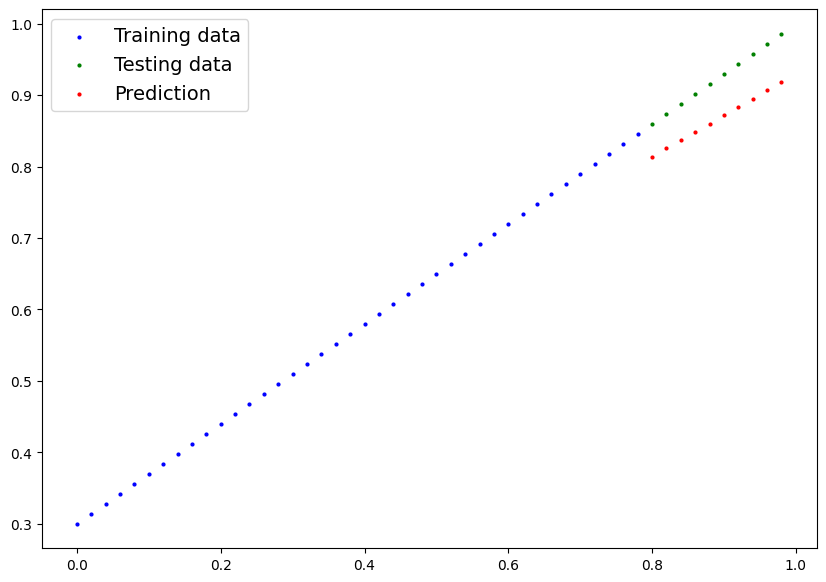

In [37]:
plot_prediction(prediction = y_pred)